In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read data
all_linestyle = ['-', '--', '-.', ':','-', '--', '-.',':']
font_size = 25
figure_high = 4
figure_width = 7.5
figure_linewidth = 3
figure_dpi = 200
legend_size = 17
axis_size = 20
marker_size = 10
marker_list = ["p", "d", "v", "x", "s", "*", "1", "."]

os.makedirs("Figure" , exist_ok=True)

current_scheme = "DD-PI"
the_file = open("data/"+current_scheme+"/R3/defender_uncertainty.pkl", "rb")
def_uncertainty_history = pickle.load(the_file)
the_file.close()

the_file = open("data/"+current_scheme+"/R3/attacker_uncertainty.pkl", "rb")
att_uncertainty_history = pickle.load(the_file)
the_file.close()

the_file = open("data/"+current_scheme+"/Time_to_SF.pkl", "rb")
Time_to_SF = pickle.load(the_file)
the_file.close()



NameError: name 'os' is not defined

In [6]:
# import pylab

# schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]
# fig = pylab.figure()
# figlegend = pylab.figure(figsize=(3, 2))
# ax = fig.add_subplot(111)
# for index in range(4):
#     lines = ax.plot(range(10), pylab.randn(10))
#     figlegend.legend(lines, [schemes[index]], 'center')
# # lines = ax.plot(range(10), pylab.randn(10), range(10), pylab.randn(10),
# #                 range(10), pylab.randn(10), range(10), pylab.randn(10))

# fig.show()
# figlegend.show()
# figlegend.savefig('legend.png')

{0: [0.0, 0.0, 0.0, 0.0, 0.0, 4.600000000000001, 4.600000000000001, 4.600000000000001, 4.600000000000001, 1.0, 4.600000000000001, 4.6000000000000005, 1.0, 4.600000000000001, 4.600000000000001, 4.6000000000000005, 1.0, 10.0, 10.0, 5.499944081797205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.600000000000001, 1.0, 4.600000000000001, 4.600000000000001, 4.6000000000000005, 4.6000000000000005, 1.0, 4.6000000000000005, 4.600000000000001, 4.6000000000000005, 1.0, 4.6000000000000005, 4.6000000000000005, 1.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.600000000000001, 4.600000000000001, 4.6000000000000005, 4.6000000000000005, 1.0, 1.0, 4.600000000000001, 4.600000000000001, 4.600000000000001, 1.0, 6.399954702397964, 10.0, 7.749964611137087, 1.0018666849202817, 7.749964611137087, 7.74998413368665, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.200000000000003, 4.6000000000000005, 4.6000000000000005, 10.0, 10.0, 1.0001342114916902, 10.0, 0.0, 0.0, 6.399973956536051, 0.0, 1.0, 3.999999999999999, 1.0, 4.600000000000001, 4.60

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


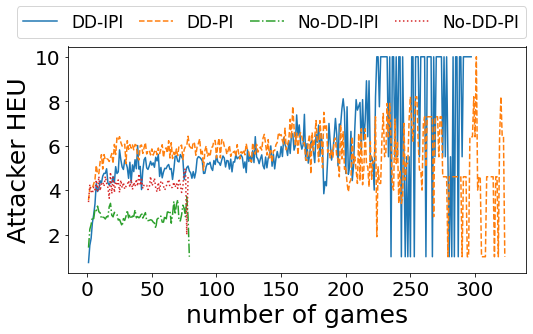

In [4]:
# Attacker's HEU
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high+0.75))
for schemes_index in range(len(schemes)):
    the_file = open("data/" + schemes[schemes_index] + "/R1/att_HEU.pkl", "rb")
    att_HEU_history = pickle.load(the_file)
    print(att_HEU_history)
    the_file.close()

    max_length = 0
    for key in att_HEU_history.keys():
        if max_length < len(att_HEU_history[key]):
            max_length = len(att_HEU_history[key])

    average_att_HEU = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in att_HEU_history.keys():
            if len(att_HEU_history[key]) > 0:
                sum_on_index += att_HEU_history[key][0]
                att_HEU_history[key].pop(0)
                number_on_index += 1
        average_att_HEU.append(sum_on_index / number_on_index)

    x_values = range(len(average_att_HEU))
    y_values = average_att_HEU
    plt.plot(x_values[1:],
             y_values[1:],
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index])
plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(-0.13, 1, 1.15, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("Attacker HEU", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/att-HEU-NG.eps", dpi=figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


100
100
100
100


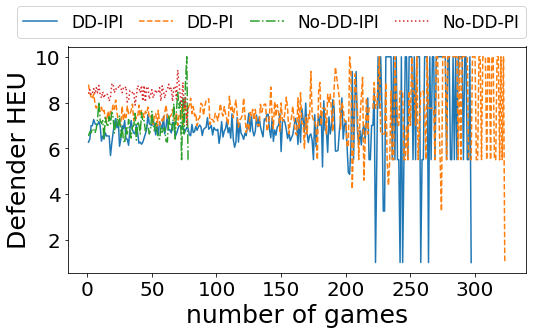

In [5]:
# Defender's HEU
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high+0.75))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R1/def_HEU.pkl", "rb")
    def_HEU_history = pickle.load(the_file)
    the_file.close()

    
    max_length = 0
    for key in def_HEU_history.keys():
        if max_length < len(def_HEU_history[key]):
            max_length = len(def_HEU_history[key])

    average_def_HEU = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in def_HEU_history.keys():
            if len(def_HEU_history[key]) > 0:
                sum_on_index += def_HEU_history[key][0]
                def_HEU_history[key].pop(0)
                number_on_index += 1
        average_def_HEU.append(sum_on_index/number_on_index)



    x_values = range(len(average_def_HEU))
    y_values = average_def_HEU
    plt.plot(x_values[1:], y_values[1:], linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index])
plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(-0.13, 1, 1.15, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("Defender HEU", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/def-HEU-NG.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


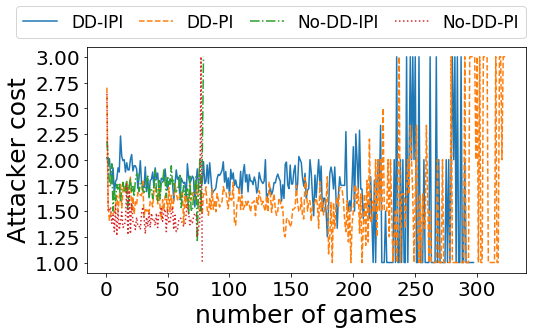

In [9]:
# Attacker Cost
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high+0.75))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R6/att_cost.pkl", "rb")
    att_cost_all_result = pickle.load(the_file)
    the_file.close()


    max_length = 0
    for key in att_cost_all_result.keys():
        if max_length < len(att_cost_all_result[key]):
            max_length = len(att_cost_all_result[key])

    average_att_cost = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in att_cost_all_result.keys():
            if len(att_cost_all_result[key]) > 0:
                sum_on_index += att_cost_all_result[key][0]
                att_cost_all_result[key].pop(0)
                number_on_index += 1
        average_att_cost.append(sum_on_index/number_on_index)



    x_values = range(len(average_att_cost))
    y_values = average_att_cost

    plt.plot(x_values[1:], y_values[1:], linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index])   
plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(-0.18, 1, 1.2, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("Attacker cost", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/att-cost-NG.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


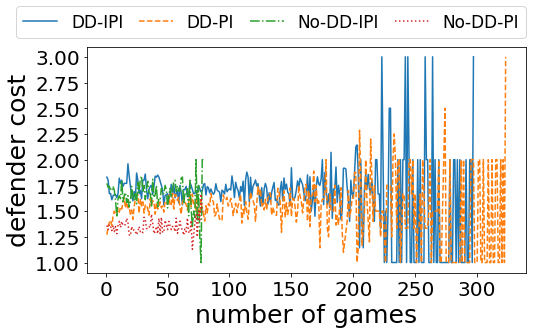

In [10]:
# Defender Cost
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high+0.75))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R6/def_cost.pkl", "rb")
    def_cost_all_result = pickle.load(the_file)
    the_file.close()


    max_length = 0
    for key in def_cost_all_result.keys():
        if max_length < len(def_cost_all_result[key]):
            max_length = len(def_cost_all_result[key])

    average_def_cost = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in def_cost_all_result.keys():
            if len(def_cost_all_result[key]) > 0:
                sum_on_index += def_cost_all_result[key][0]
                def_cost_all_result[key].pop(0)
                number_on_index += 1
        average_def_cost.append(sum_on_index/number_on_index)



    x_values = range(len(average_def_cost))
    y_values = average_def_cost

    plt.plot(x_values[1:], y_values[1:], linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index])
plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(-0.18, 1, 1.2, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("defender cost", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/def-cost-NG.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


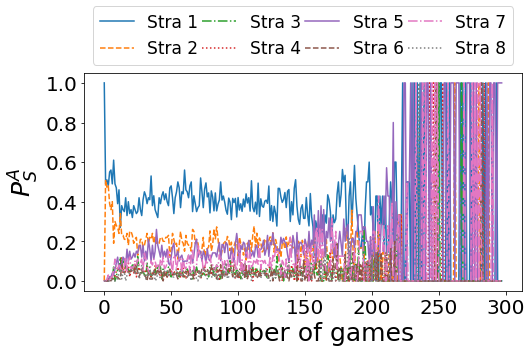

In [4]:
# Attacker Strategy DD-IPI

the_file = open("data/DD-IPI/R2/att_strategy_counter.pkl", "rb")
att_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high+1))
max_length = 0
for key in att_strat_count.keys():
    if max_length < len(att_strat_count[key]):
        max_length = len(att_strat_count[key])

average_att_strat = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    att_strat = np.zeros(8)
    for key in att_strat_count.keys():
        if len(att_strat_count[key]) > 0:
            att_strat[att_strat_count[key][0]] += 1
            att_strat_count[key].pop(0)
            number_on_index += 1
    average_att_strat.append((att_strat / number_on_index).tolist())
average_att_strat = np.array(average_att_strat)

for index in range(8):
    plt.plot(range(max_length),
             average_att_strat[:, index],
             linestyle=all_linestyle[index],
             label=f"Stra {index+1}")

plt.legend(prop={"size": legend_size},
           ncol=4,
           bbox_to_anchor=(0, 1, 1, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("$P_S^A$", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/DD-IPI-att-Strat.eps", dpi=figure_dpi)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


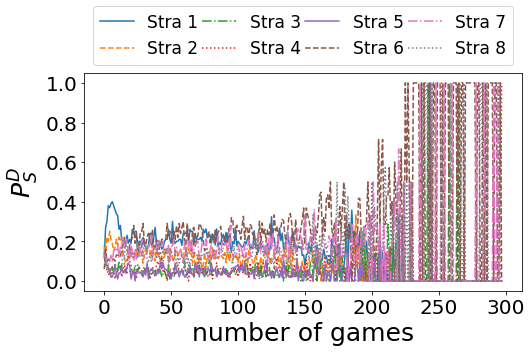

In [5]:
# Defender Strategy DD-IPI

the_file = open("data/DD-IPI/R2/def_strategy_counter.pkl", "rb")
def_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high + 1))
max_length = 0
for key in def_strat_count.keys():
    if max_length < len(def_strat_count[key]):
        max_length = len(def_strat_count[key])

average_def_strat = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    def_strat = np.zeros(8)
    for key in def_strat_count.keys():
        if len(def_strat_count[key]) > 0:
            def_strat[def_strat_count[key][0]] += 1
            def_strat_count[key].pop(0)
            number_on_index += 1
    average_def_strat.append((def_strat / number_on_index).tolist())
average_def_strat = np.array(average_def_strat)

all_linestyle = ['-', '--', '-.', ':', '-', '--', '-.', ':']
for index in range(8):
    plt.plot(range(max_length),
             average_def_strat[:, index],
             linestyle=all_linestyle[index],
             label=f"Stra {index+1}")

plt.legend(prop={"size": legend_size},
           ncol=4,
           bbox_to_anchor=(0, 1, 1, 0),
           loc='lower left',
           mode="expand")

plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("$P_S^D$", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/DD-IPI-def-Strat.eps", dpi=figure_dpi)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


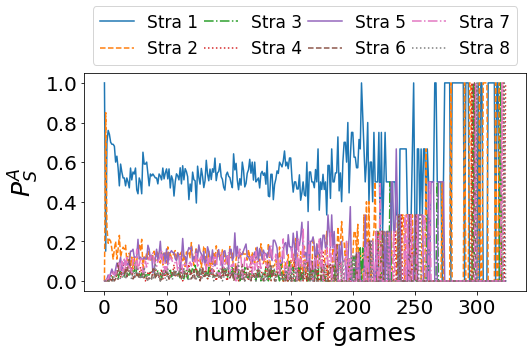

In [13]:
# Attacker Strategy DD-PI

the_file = open("data/DD-PI/R2/att_strategy_counter.pkl", "rb")
att_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high+1))
max_length = 0
for key in att_strat_count.keys():
    if max_length < len(att_strat_count[key]):
        max_length = len(att_strat_count[key])

average_att_strat = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    att_strat = np.zeros(8)
    for key in att_strat_count.keys():
        if len(att_strat_count[key]) > 0:
            att_strat[att_strat_count[key][0]] += 1
            att_strat_count[key].pop(0)
            number_on_index += 1
    average_att_strat.append((att_strat/number_on_index).tolist())
average_att_strat = np.array(average_att_strat)


for index in range(8):
    plt.plot(range(max_length), average_att_strat[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")

plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(0, 1, 1, 0),
           loc='lower left',
           mode="expand")

plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("$P_S^A$", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/DD-PI-att-Strat.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


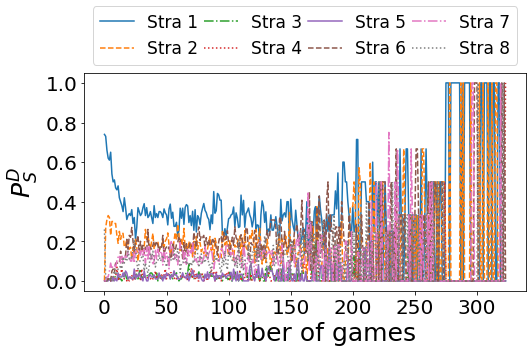

In [14]:
# Defender Strategy DD-PI

the_file = open("data/DD-PI/R2/def_strategy_counter.pkl", "rb")
def_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high+1))
max_length = 0
for key in def_strat_count.keys():
    if max_length < len(def_strat_count[key]):
        max_length = len(def_strat_count[key])

average_def_strat = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    def_strat = np.zeros(8)
    for key in def_strat_count.keys():
        if len(def_strat_count[key]) > 0:
            def_strat[def_strat_count[key][0]] += 1
            def_strat_count[key].pop(0)
            number_on_index += 1
    average_def_strat.append((def_strat/number_on_index).tolist())
average_def_strat = np.array(average_def_strat)

all_linestyle = ['-', '--', '-.', ':','-', '--', '-.',':']
for index in range(8):
    plt.plot(range(max_length), average_def_strat[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")

plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(0, 1, 1, 0),
           loc='lower left',
           mode="expand")

plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("$P_S^D$", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/DD-PI-def-Strat.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


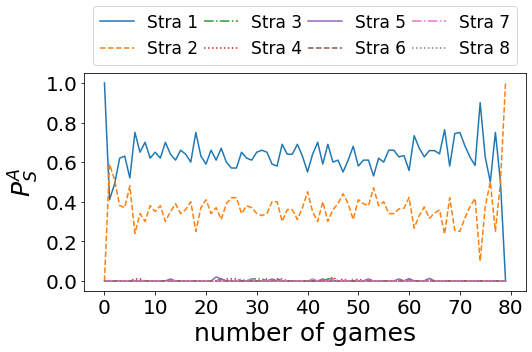

In [15]:
# Attacker Strategy No-DD-IPI

the_file = open("data/No-DD-IPI/R2/att_strategy_counter.pkl", "rb")
att_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high+1))
max_length = 0
for key in att_strat_count.keys():
    if max_length < len(att_strat_count[key]):
        max_length = len(att_strat_count[key])

average_att_strat = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    att_strat = np.zeros(8)
    for key in att_strat_count.keys():
        if len(att_strat_count[key]) > 0:
            att_strat[att_strat_count[key][0]] += 1
            att_strat_count[key].pop(0)
            number_on_index += 1
    average_att_strat.append((att_strat/number_on_index).tolist())
average_att_strat = np.array(average_att_strat)


for index in range(8):
    plt.plot(range(max_length), average_att_strat[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")

plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(0, 1, 1, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("$P_S^A$", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/No-DD-IPI-att-Strat.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


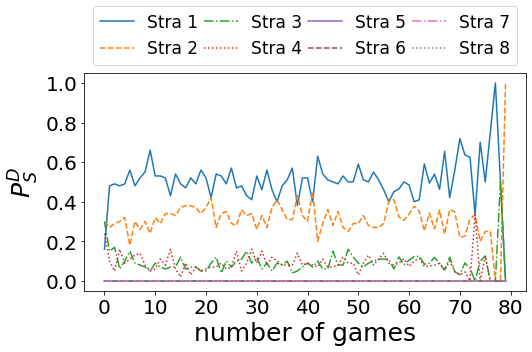

In [16]:
# Defender Strategy No-DD-IPI

the_file = open("data/No-DD-IPI/R2/def_strategy_counter.pkl", "rb")
def_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high+1))
max_length = 0
for key in def_strat_count.keys():
    if max_length < len(def_strat_count[key]):
        max_length = len(def_strat_count[key])

average_def_strat = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    def_strat = np.zeros(8)
    for key in def_strat_count.keys():
        if len(def_strat_count[key]) > 0:
            def_strat[def_strat_count[key][0]] += 1
            def_strat_count[key].pop(0)
            number_on_index += 1
    average_def_strat.append((def_strat/number_on_index).tolist())
average_def_strat = np.array(average_def_strat)

all_linestyle = ['-', '--', '-.', ':','-', '--', '-.',':']
for index in range(8):
    plt.plot(range(max_length), average_def_strat[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")

plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(0, 1, 1, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("$P_S^D$", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/No-DD-IPI-def-Strat.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


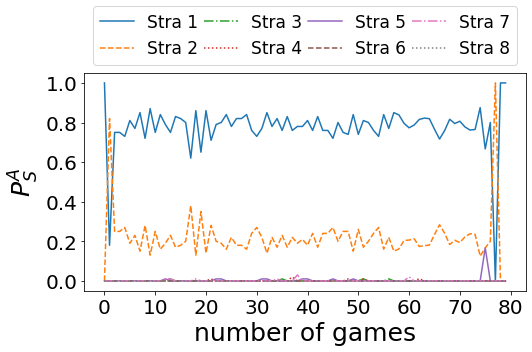

In [17]:
# Attacker Strategy No-DD-PI

the_file = open("data/No-DD-PI/R2/att_strategy_counter.pkl", "rb")
att_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high+1))
max_length = 0
for key in att_strat_count.keys():
    if max_length < len(att_strat_count[key]):
        max_length = len(att_strat_count[key])

average_att_strat = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    att_strat = np.zeros(8)
    for key in att_strat_count.keys():
        if len(att_strat_count[key]) > 0:
            att_strat[att_strat_count[key][0]] += 1
            att_strat_count[key].pop(0)
            number_on_index += 1
    average_att_strat.append((att_strat/number_on_index).tolist())
average_att_strat = np.array(average_att_strat)


for index in range(8):
    plt.plot(range(max_length), average_att_strat[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")

plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(0, 1, 1, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("$P_S^A$", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/No-DD-PI-att-Strat.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


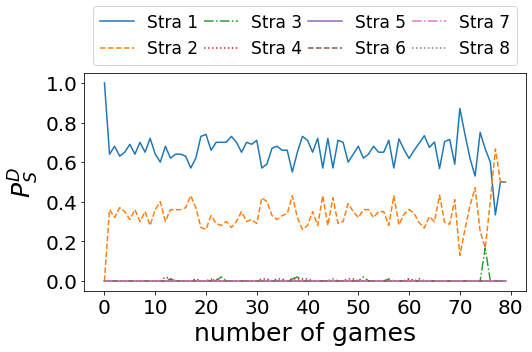

In [18]:
# Defender Strategy No-DD-PI

the_file = open("data/No-DD-PI/R2/def_strategy_counter.pkl", "rb")
def_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high+1))
max_length = 0
for key in def_strat_count.keys():
    if max_length < len(def_strat_count[key]):
        max_length = len(def_strat_count[key])

average_def_strat = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    def_strat = np.zeros(8)
    for key in def_strat_count.keys():
        if len(def_strat_count[key]) > 0:
            def_strat[def_strat_count[key][0]] += 1
            def_strat_count[key].pop(0)
            number_on_index += 1
    average_def_strat.append((def_strat/number_on_index).tolist())
average_def_strat = np.array(average_def_strat)

all_linestyle = ['-', '--', '-.', ':','-', '--', '-.',':']
for index in range(8):
    plt.plot(range(max_length), average_def_strat[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")

plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(0, 1, 1, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("$P_S^D$", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/No-DD-PI-def-Strat.eps", dpi = figure_dpi)


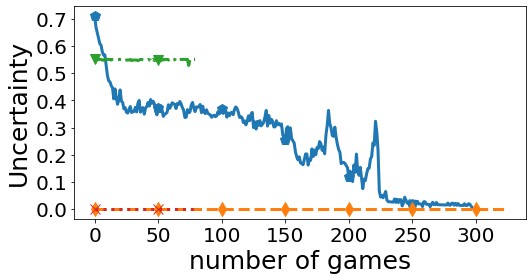

In [6]:
# attacker uncertainty average result
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R3/attacker_uncertainty.pkl", "rb")
    att_uncertainty_history = pickle.load(the_file)
    the_file.close()

    max_length = 0
    max_index = 0
    for key in att_uncertainty_history.keys():
        if max_length < len(att_uncertainty_history[key]):
            max_length = len(att_uncertainty_history[key])
            max_index = key

    # print(att_uncertainty_history[max_index])
    # plt.plot(range(len(att_uncertainty_history[max_index])), att_uncertainty_history[max_index])

    average_att_uncertainty = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in att_uncertainty_history.keys():
            if len(att_uncertainty_history[key]) > 0:
                sum_on_index += att_uncertainty_history[key][0]
                att_uncertainty_history[key].pop(0)
                number_on_index += 1
        average_att_uncertainty.append(sum_on_index/number_on_index)


    x_values = range(len(average_att_uncertainty))
    y_values = average_att_uncertainty
    plt.plot(x_values, y_values, linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index],
             linewidth=figure_linewidth, marker=marker_list[schemes_index], markevery=50, markersize = marker_size)
# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
# plt.legend(prop={"size":legend_size}, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("Uncertainty", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/att-uncertain-NG.eps", dpi = figure_dpi)


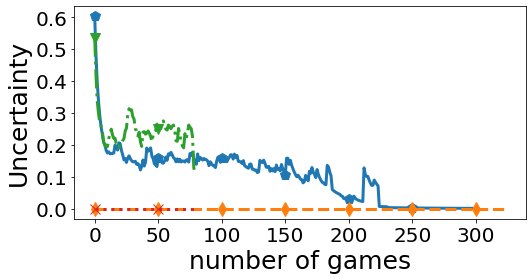

In [7]:
# defender uncertainty average result
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R3/defender_uncertainty.pkl", "rb")
    def_uncertainty_history = pickle.load(the_file)
    the_file.close()


    max_length = 0
    for key in def_uncertainty_history.keys():
        if max_length < len(def_uncertainty_history[key]):
            max_length = len(def_uncertainty_history[key])

    average_def_uncertainty = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in def_uncertainty_history.keys():
            if len(def_uncertainty_history[key]) > 0:
                sum_on_index += def_uncertainty_history[key][0]
                def_uncertainty_history[key].pop(0)
                number_on_index += 1
        average_def_uncertainty.append(sum_on_index/number_on_index)


    x_values = range(len(average_def_uncertainty))
    y_values = average_def_uncertainty
    plt.plot(x_values, y_values, linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index],
             linewidth=figure_linewidth, marker=marker_list[schemes_index], markevery=50, markersize = marker_size)
# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("Uncertainty", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/def-uncertain-NG.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


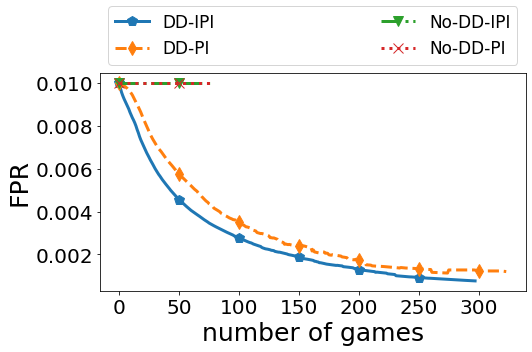

In [21]:
# IDS FPR
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high+1))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R4/FPR.pkl", "rb")
    FPR_history = pickle.load(the_file)
    the_file.close()

    max_length = 0
    for key in FPR_history.keys():
        if max_length < len(FPR_history[key]):
            max_length = len(FPR_history[key])


    average_FPR = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in FPR_history.keys():
            if len(FPR_history[key]) > 0:
                sum_on_index += FPR_history[key][0]
                FPR_history[key].pop(0)
                number_on_index += 1
        average_FPR.append(sum_on_index/number_on_index)



    x_values = range(len(average_FPR))
    y_values = average_FPR

    plt.plot(x_values, y_values, linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index],
             linewidth=figure_linewidth, marker=marker_list[schemes_index], markevery=50, markersize = marker_size)
plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
              loc='lower left', fontsize='large',mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("FPR", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/FPR-NG.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


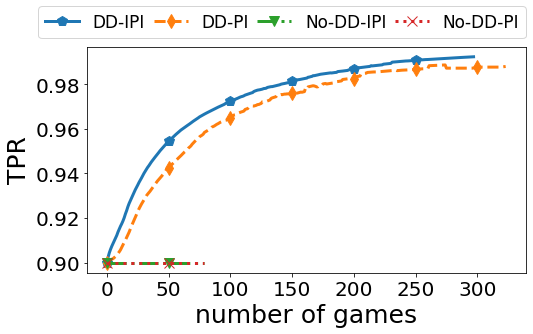

In [22]:
# IDS TPR
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high+0.75))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R4/TPR.pkl", "rb")
    TPR_history = pickle.load(the_file)
    the_file.close()

    max_length = 0
    for key in TPR_history.keys():
        if max_length < len(TPR_history[key]):
            max_length = len(TPR_history[key])


    average_TPR = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in TPR_history.keys():
            if len(TPR_history[key]) > 0:
                sum_on_index += TPR_history[key][0]
                TPR_history[key].pop(0)
                number_on_index += 1
        average_TPR.append(sum_on_index/number_on_index)



    x_values = range(len(average_TPR))
    y_values = average_TPR

    plt.plot(x_values, y_values, linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index],
             linewidth=figure_linewidth, marker=marker_list[schemes_index], markevery=50, markersize = marker_size)
plt.legend(prop={"size":legend_size},
           ncol=4,
           bbox_to_anchor=(-0.13, 1, 1.15, 0),
           loc='lower left',
           mode="expand")
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel("TPR", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/TPR-NG.eps", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


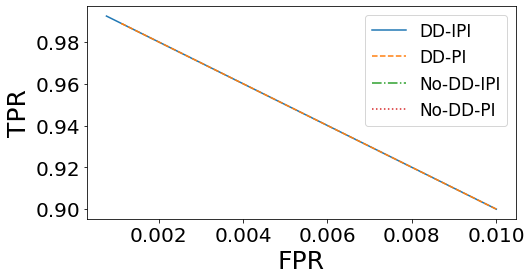

In [8]:
# ROC
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R4/TPR.pkl", "rb")
    TPR_history = pickle.load(the_file)
    the_file.close()
    the_file = open("data/"+schemes[schemes_index]+"/R4/FPR.pkl", "rb")
    FPR_history = pickle.load(the_file)
    the_file.close()
    

    max_length = 0
    for key in TPR_history.keys():
        if max_length < len(TPR_history[key]):
            max_length = len(TPR_history[key])


    average_TPR = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in TPR_history.keys():
            if len(TPR_history[key]) > 0:
                sum_on_index += TPR_history[key][0]
                TPR_history[key].pop(0)
                number_on_index += 1
        average_TPR.append(sum_on_index/number_on_index)
    
    average_FPR = []
    for index in range(max_length):
        sum_on_index = 0
        number_on_index = 0
        for key in FPR_history.keys():
            if len(FPR_history[key]) > 0:
                sum_on_index += FPR_history[key][0]
                FPR_history[key].pop(0)
                number_on_index += 1
        average_FPR.append(sum_on_index/number_on_index)



    x_values = average_FPR
    
#     print(average_TPR)
#     print(average_FPR)
    y_values = average_TPR

    plt.plot(x_values, y_values, linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index])
plt.legend(prop={"size":legend_size})
plt.xlabel("FPR", fontsize=font_size)
plt.ylabel("TPR", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/ROC-NG.eps", dpi = figure_dpi)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text yticklabel objects>)

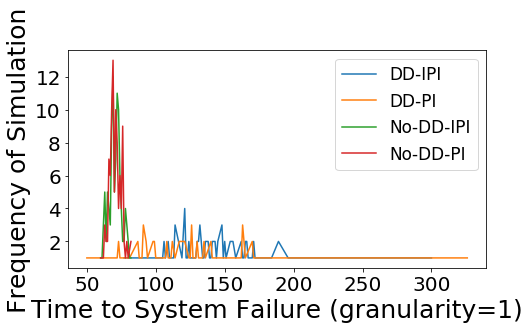

In [24]:
# Time to System Fail
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

granularity = 1

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/Time_to_SF.pkl", "rb")
    Time_to_SF = pickle.load(the_file)
    the_file.close()

#     print(max(Time_to_SF.values()))
    x_scales = np.zeros(max(Time_to_SF.values())+1)
    y_scales = np.zeros(max(Time_to_SF.values())+1)
    for value in Time_to_SF.values():
        x_scales[int(value/granularity)*granularity] = int(value/granularity)*granularity+1
        y_scales[int(value/granularity)*granularity] += 1
    

    # pop zero in array
    x_scales = x_scales[x_scales!=0]   
    y_scales = y_scales[y_scales!=0]
#     plt.scatter(x_scales, y_scales, label=schemes[schemes_index])
    plt.plot(x_scales, y_scales, label=schemes[schemes_index])

plt.legend(prop={"size":legend_size})
plt.xlabel(f"Time to System Failure (granularity={granularity})", fontsize=font_size)
plt.ylabel("Frequency of Simulation", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)


In [25]:
# # MTTSF
# current_scheme = "scheme_DD_PI"
# the_file = open("data/"+current_scheme+"/R5/MTTSF.pkl", "rb")
# MTTSF_all_result = pickle.load(the_file)
# the_file.close()

# print(MTTSF_all_result)
# print(sum(MTTSF_all_result)/len(MTTSF_all_result))




In [ ]:
# Vulnerability Range (x-axis)

the_file = open("data/DD-IPI/Vul_Range.pkl", "rb")
vul_range = pickle.load(the_file)
the_file.close()
print(vul_range)


[167. 120. 137. 156. 154.]
[204. 101.  78. 127. 116.]
[63. 68. 64. 69. 72.]
[68. 54. 63. 56. 66.]


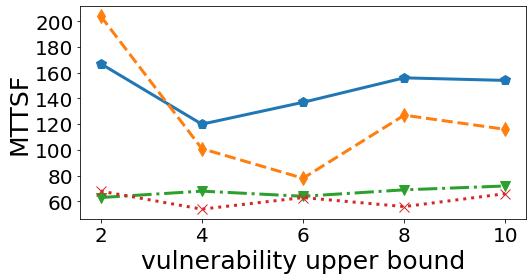

In [6]:
# MTTSF
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/" + schemes[schemes_index] + "/R5/MTTSF.pkl", "rb")
    MTTSF = pickle.load(the_file)
    the_file.close()

    print(MTTSF)


#     x_scales_all_change = [
#         "IoT:(1,2)\nWeb&Data:(1,2)", "IoT:(1,4)\nWeb&Data:(1,4)",
#         "IoT:(1,6)\nWeb&Data:(1,6)", "IoT:(1,8)\nWeb&Data:(1,8)",
#         "IoT:(1,10)\nWeb&Data:(1,10)"
#     ]
    x_scales_all_change = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales_all_change,
             MTTSF,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)

# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("MTTSF", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/MTTSF-VV.eps", dpi = figure_dpi)


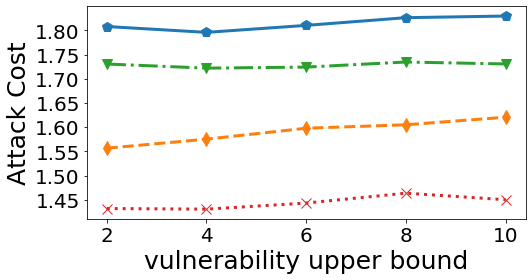

In [12]:
# R8 attacker cost in changing Vul

schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/" + schemes[schemes_index] + "/R8/att_cost.pkl",
                    "rb")
    att_cost_all_result = pickle.load(the_file)
    the_file.close()

#     x_scales = [
#         f"IoT:(1,{vul_range[1][0]})\nWeb&Data:(1,{vul_range[0][0]})",
#         f"IoT:(1,{vul_range[1][1]})\nWeb&Data:(1,{vul_range[0][1]})",
#         f"IoT:(1,{vul_range[1][2]})\nWeb&Data:(1,{vul_range[0][2]})",
#         f"IoT:(1,{vul_range[1][3]})\nWeb&Data:(1,{vul_range[0][3]})",
#         f"IoT:(1,{vul_range[1][4]})\nWeb&Data:(1,{vul_range[0][4]})"
#     ]
    x_scales = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales,
             att_cost_all_result,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)

# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("Attack Cost", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/att-cost-VV.eps", dpi = figure_dpi)


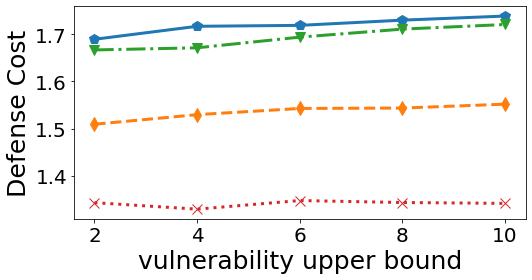

In [13]:
# R8 defender cost in changing Vul

schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/" + schemes[schemes_index] + "/R8/def_cost.pkl",
                    "rb")
    def_cost_all_result = pickle.load(the_file)
    the_file.close()

#     x_scales = [
#         f"IoT:(1,{vul_range[1][0]})\nWeb&Data:(1,{vul_range[0][0]})",
#         f"IoT:(1,{vul_range[1][1]})\nWeb&Data:(1,{vul_range[0][1]})",
#         f"IoT:(1,{vul_range[1][2]})\nWeb&Data:(1,{vul_range[0][2]})",
#         f"IoT:(1,{vul_range[1][3]})\nWeb&Data:(1,{vul_range[0][3]})",
#         f"IoT:(1,{vul_range[1][4]})\nWeb&Data:(1,{vul_range[0][4]})"
#     ]

    x_scales = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales,
             def_cost_all_result,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)

# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("Defense Cost", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.tight_layout()
plt.savefig("Figure/def-cost-VV.eps", dpi = figure_dpi)


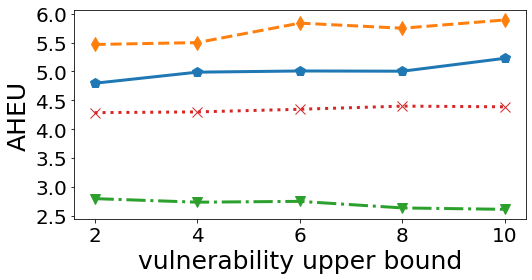

In [14]:
# R9 attacker HEU in changing Vul

schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/" + schemes[schemes_index] + "/R9/att_HEU.pkl", "rb")
    att_HEU_all_result = pickle.load(the_file)
    the_file.close()

#     x_scales = [
#         f"IoT:(1,{vul_range[1][0]})\nWeb&Data:(1,{vul_range[0][0]})",
#         f"IoT:(1,{vul_range[1][1]})\nWeb&Data:(1,{vul_range[0][1]})",
#         f"IoT:(1,{vul_range[1][2]})\nWeb&Data:(1,{vul_range[0][2]})",
#         f"IoT:(1,{vul_range[1][3]})\nWeb&Data:(1,{vul_range[0][3]})",
#         f"IoT:(1,{vul_range[1][4]})\nWeb&Data:(1,{vul_range[0][4]})"
#     ]
    
    x_scales = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales,
             att_HEU_all_result,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)

# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("AHEU", fontsize=font_size)
plt.xticks(fontsize=axis_size)
plt.yticks(fontsize=axis_size);
plt.tight_layout()
plt.savefig("Figure/att-HEU-VV.eps", dpi = figure_dpi)


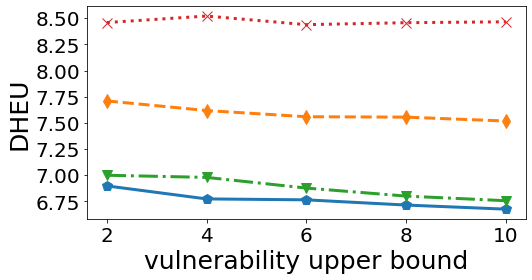

In [15]:
# R9 defender HEU in changing Vul

schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/" + schemes[schemes_index] + "/R9/def_HEU.pkl", "rb")
    def_HEU_all_result = pickle.load(the_file)
    the_file.close()

#     x_scales = [
#         f"IoT:(1,{vul_range[1][0]})\nWeb&Data:(1,{vul_range[0][0]})",
#         f"IoT:(1,{vul_range[1][1]})\nWeb&Data:(1,{vul_range[0][1]})",
#         f"IoT:(1,{vul_range[1][2]})\nWeb&Data:(1,{vul_range[0][2]})",
#         f"IoT:(1,{vul_range[1][3]})\nWeb&Data:(1,{vul_range[0][3]})",
#         f"IoT:(1,{vul_range[1][4]})\nWeb&Data:(1,{vul_range[0][4]})"
#     ]

    x_scales = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales,
             def_HEU_all_result,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)

# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("DHEU", fontsize=font_size)
plt.xticks(fontsize=axis_size);
plt.yticks(fontsize=axis_size);
plt.tight_layout()
plt.savefig("Figure/def-HEU-VV.eps", dpi = figure_dpi)


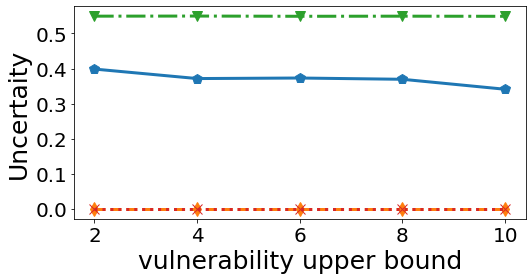

In [10]:
# R10 attacker Uncertainty in changing Vul

schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open(
        "data/" + schemes[schemes_index] + "/R10/att_uncertainty.pkl", "rb")
    att_uncertainty_all_result = pickle.load(the_file)
    the_file.close()

#     x_scales = [
#         f"IoT:(1,{vul_range[1][0]})\nWeb&Data:(1,{vul_range[0][0]})",
#         f"IoT:(1,{vul_range[1][1]})\nWeb&Data:(1,{vul_range[0][1]})",
#         f"IoT:(1,{vul_range[1][2]})\nWeb&Data:(1,{vul_range[0][2]})",
#         f"IoT:(1,{vul_range[1][3]})\nWeb&Data:(1,{vul_range[0][3]})",
#         f"IoT:(1,{vul_range[1][4]})\nWeb&Data:(1,{vul_range[0][4]})"
#     ]

    x_scales = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales,
             att_uncertainty_all_result,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)

# plt.legend(prop={"size":15}, ncol=4, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("Uncertaity", fontsize=font_size)
plt.xticks(fontsize=axis_size);
plt.yticks(fontsize=axis_size);
plt.tight_layout()
plt.savefig("Figure/att-uncertain-VV.eps", dpi = figure_dpi)
plt.savefig("Figure (PNG)/att-uncertain-VV.png", dpi = figure_dpi)


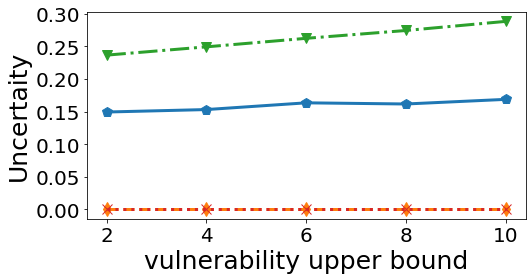

In [9]:
# R10 defender Uncertainty in changing Vul

schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open(
        "data/" + schemes[schemes_index] + "/R10/def_uncertainty.pkl", "rb")
    def_uncertainty_all_result = pickle.load(the_file)
    the_file.close()

#     x_scales = [
#         f"IoT:(1,{vul_range[1][0]})\nWeb&Data:(1,{vul_range[0][0]})",
#         f"IoT:(1,{vul_range[1][1]})\nWeb&Data:(1,{vul_range[0][1]})",
#         f"IoT:(1,{vul_range[1][2]})\nWeb&Data:(1,{vul_range[0][2]})",
#         f"IoT:(1,{vul_range[1][3]})\nWeb&Data:(1,{vul_range[0][3]})",
#         f"IoT:(1,{vul_range[1][4]})\nWeb&Data:(1,{vul_range[0][4]})"
#     ]

    x_scales = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales,
             def_uncertainty_all_result,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)

# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("Uncertaity", fontsize=font_size)
plt.xticks(fontsize=axis_size);
plt.yticks(fontsize=axis_size);
plt.tight_layout()
plt.savefig("Figure/def-uncertain-VV.eps", dpi = figure_dpi)
plt.savefig("Figure (PNG)/def-uncertain-VV.png", dpi = figure_dpi)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


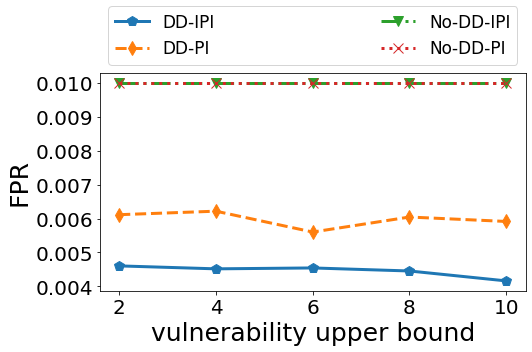

In [18]:
# R11 FPR in changing Vul

schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high+1))
for schemes_index in range(len(schemes)):
    the_file = open(
        "data/" + schemes[schemes_index] + "/R11/FPR.pkl", "rb")
    FPR_all_result = pickle.load(the_file)
    the_file.close()

#     x_scales = [
#         f"IoT:(1,{vul_range[1][0]})\nWeb&Data:(1,{vul_range[0][0]})",
#         f"IoT:(1,{vul_range[1][1]})\nWeb&Data:(1,{vul_range[0][1]})",
#         f"IoT:(1,{vul_range[1][2]})\nWeb&Data:(1,{vul_range[0][2]})",
#         f"IoT:(1,{vul_range[1][3]})\nWeb&Data:(1,{vul_range[0][3]})",
#         f"IoT:(1,{vul_range[1][4]})\nWeb&Data:(1,{vul_range[0][4]})"
#     ]

    x_scales = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales,
             FPR_all_result,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)

plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
              loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("FPR", fontsize=font_size)
plt.xticks(fontsize=axis_size);
plt.yticks(fontsize=axis_size);
plt.tight_layout()
plt.savefig("Figure/FPR-VV.eps", dpi = figure_dpi)



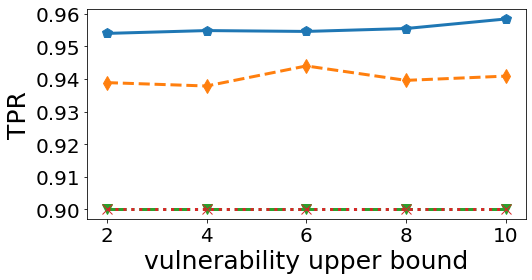

In [19]:
# R11 TPR in changing Vul

schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open(
        "data/" + schemes[schemes_index] + "/R11/TPR.pkl", "rb")
    TPR_all_result = pickle.load(the_file)
    the_file.close()

#     x_scales = [
#         f"IoT:(1,{vul_range[1][0]})\nWeb&Data:(1,{vul_range[0][0]})",
#         f"IoT:(1,{vul_range[1][1]})\nWeb&Data:(1,{vul_range[0][1]})",
#         f"IoT:(1,{vul_range[1][2]})\nWeb&Data:(1,{vul_range[0][2]})",
#         f"IoT:(1,{vul_range[1][3]})\nWeb&Data:(1,{vul_range[0][3]})",
#         f"IoT:(1,{vul_range[1][4]})\nWeb&Data:(1,{vul_range[0][4]})"
#     ]

    x_scales = ["2", "4", "6", "8", "10"]

    plt.plot(x_scales,
             TPR_all_result,
             linestyle=all_linestyle[schemes_index],
             label=schemes[schemes_index],
             linewidth=figure_linewidth,
             marker=marker_list[schemes_index], markersize = marker_size)
    
# plt.legend(prop={"size":legend_size}, ncol=2, bbox_to_anchor=(0, 1, 1, 0),
#               loc='lower left', fontsize='large',mode="expand")
plt.xlabel("vulnerability upper bound", fontsize=font_size)
plt.ylabel("TPR", fontsize=font_size)
plt.xticks(fontsize=axis_size);
plt.yticks(fontsize=axis_size);
plt.tight_layout()
plt.savefig("Figure/TPR-VV.eps", dpi = figure_dpi)


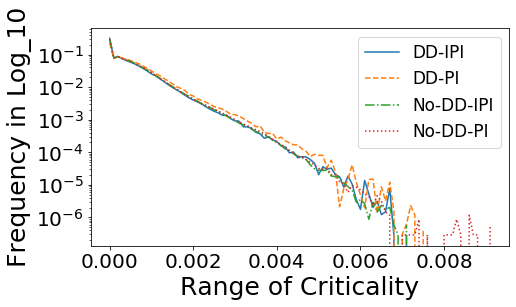

In [36]:
# criticality distribution
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

plt.figure(figsize=(figure_width, figure_high))
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R_self_1/criticality.pkl", "rb")
    criti_history = pickle.load(the_file)
    the_file.close()

    total_criticality = np.zeros(100000)
    for key in criti_history.keys():
        total_criticality += criti_history[key]
#         print(total_criticality)
    
    last_ele = np.max(np.nonzero(total_criticality))
    total_criticality = total_criticality[ :last_ele+1]
#     total_criticality = total_criticality/len(criti_history)
#     print(sum(total_criticality))

    x_values = np.array(range(len(total_criticality)))/10000
    y_values = total_criticality/sum(total_criticality)

    plt.plot(x_values, y_values, linestyle=all_linestyle[schemes_index] , label=schemes[schemes_index])
    plt.yscale('log')

plt.legend(prop={"size":legend_size})
plt.xlabel("Range of Criticality", fontsize=font_size)
plt.ylabel("Frequency in Log_10", fontsize=font_size)
plt.xticks(fontsize=axis_size);
plt.yticks(fontsize=axis_size);

In [37]:
# # Evict attacker reason
# schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

# for schemes_index in range(len(schemes)):
#     the_file = open("data/"+schemes[schemes_index]+"/R_self_2/evict_reason.pkl", "rb")
#     evict_reson_history = pickle.load(the_file)
#     the_file.close()

#     plt.figure(figsize=(figure_width, figure_high))
#     total_reson = np.zeros(2)
#     for key in evict_reson_history:
#         total_reson += evict_reson_history[key]

#     plt.bar(["Be outside", "Honeypot"], total_reson)

#     plt.title(schemes[schemes_index], fontsize=font_size)
#     plt.xlabel("Reasons for Creating New Attacker", fontsize=font_size)
#     plt.ylabel("number of attacker Created", fontsize=font_size)


In [38]:
# # System Failure reason
# schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

# for schemes_index in range(len(schemes)):
#     the_file = open("data/"+schemes[schemes_index]+"/R_self_3/system_fail.pkl", "rb")
#     SysFail_reason = pickle.load(the_file)
#     the_file.close()

#     plt.figure(figsize=(figure_width, figure_high))
#     print(SysFail_reason)
#     x_values = ["Att Strategy 8\nSuccess","Total Compromised Criticality\nLarger Than ", "Too Many Nodes\nEvicted"]
#     y_values = SysFail_reason
#     plt.bar(x_values, y_values)

#     plt.title(schemes[schemes_index], fontsize=font_size)
#     plt.xlabel("Reasons for System Failure", fontsize=font_size)
#     plt.ylabel("number of simulation", fontsize=font_size)


In [39]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    decimal_number = 3
    for rect in rects:
        height = round(rect.get_height(), decimal_number)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

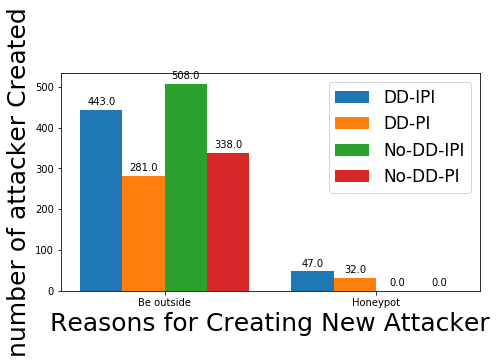

In [40]:
# Evict attacker reason
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

fig, ax = plt.subplots(figsize=(figure_width, figure_high))
width = 0.2
shift_value = [- width/2 - width, - width/2, + width/2, width/2 + width]
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R_self_2/evict_reason.pkl", "rb")
    evict_reson_history = pickle.load(the_file)
    the_file.close()

    total_reson = np.zeros(2)
    for key in evict_reson_history:
        total_reson += evict_reson_history[key]

    y_values = total_reson
    temp_x = np.arange(len(y_values))
    rects = ax.bar(temp_x +shift_value[schemes_index] , y_values, width, label=schemes[schemes_index])
    autolabel(rects)

#     plt.title(schemes[schemes_index], fontsize=font_size)
#     plt.xlabel("Reasons for Creating New Attacker", fontsize=font_size)
#     plt.ylabel("number of attacker Created", fontsize=font_size)

x_values = ["Be outside", "Honeypot"]
ax.legend(prop={"size":legend_size})
ax.set_xticks(temp_x)
ax.set_xticklabels(x_values)
ax.set_xlabel('Reasons for Creating New Attacker', fontsize=font_size)
ax.set_ylabel('number of attacker Created', fontsize=font_size)
plt.show()

[0, 0, 100]
[0, 7, 93]
[0, 0, 100]
[0, 0, 100]


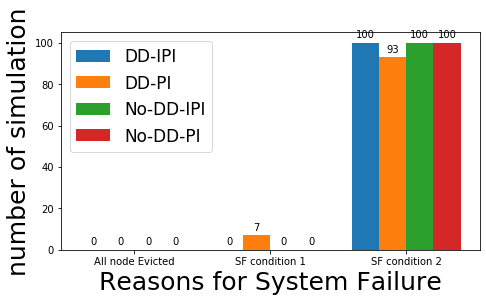

In [41]:
# System Failure reason
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

fig, ax = plt.subplots(figsize=(figure_width, figure_high))
width = 0.2
shift_value = [- width/2 - width, - width/2, + width/2, width/2 + width]
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R_self_3/system_fail.pkl", "rb")
    SysFail_reason = pickle.load(the_file)
    the_file.close()

    print(SysFail_reason)
    y_values = SysFail_reason
    temp_x = np.arange(len(y_values))
    rects = ax.bar(temp_x +shift_value[schemes_index] , y_values, width, label=schemes[schemes_index])
    autolabel(rects)


x_values = ["All node Evicted","SF condition 1", "SF condition 2"]
ax.legend(prop={"size":legend_size})
ax.set_xticks(temp_x)
ax.set_xticklabels(x_values)
ax.set_xlabel("Reasons for System Failure", fontsize=font_size)
ax.set_ylabel("number of simulation", fontsize=font_size)
plt.show()

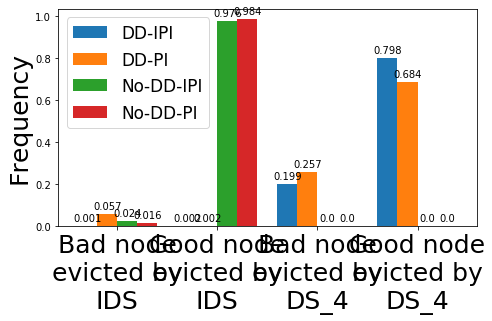

In [42]:
# NIDS Eviction
schemes = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]

fig, ax = plt.subplots(figsize=(figure_width, figure_high))
width = 0.2
shift_value = [- width/2 - width, - width/2, + width/2, width/2 + width]
for schemes_index in range(len(schemes)):
    the_file = open("data/"+schemes[schemes_index]+"/R_self_4/NIDS_eviction.pkl", "rb")
    NIDS_eviction = pickle.load(the_file)
    the_file.close()

    y_scale = np.zeros(4)
    for key in NIDS_eviction.keys():
        y_scale += NIDS_eviction[key]
        
    # get average value
    y_scale = y_scale/len(NIDS_eviction.keys())
    
    # normalize to range(0, 1)
    y_scale = y_scale/(sum(y_scale))
    
    
    temp_x = np.arange(len(y_scale))
    rects = ax.bar(temp_x +shift_value[schemes_index] , y_scale, width, label=schemes[schemes_index])
    autolabel(rects)


x_scale = ["Bad node\nevicted by\nIDS", "Good node\nevicted by\nIDS", "Bad node\nevicted by\nDS_4", "Good node\nevicted by\nDS_4"]
ax.legend(prop={"size":legend_size})
ax.set_xticks(temp_x)
ax.set_xticklabels(x_scale, fontsize=font_size)
ax.set_ylabel('Frequency', fontsize=font_size)
plt.show()


In [43]:
current_scheme = "DD-IPI"

Text(0, 0.5, "Att's EU_C in DD-IPI")

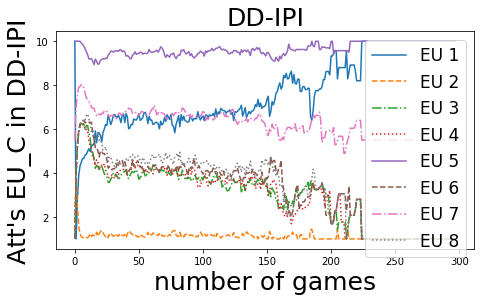

In [44]:
# Attacker EU_C
the_file = open("data/"+current_scheme+"/R_self_4/att_EU_C.pkl", "rb")
att_EU_C_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
max_length = 0
for key in att_EU_C_all_result.keys():
    if max_length < len(att_EU_C_all_result[key]):
        max_length = len(att_EU_C_all_result[key])

average_EU_C = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    att_EU_C = np.zeros(8)
    for key in att_EU_C_all_result.keys():
        if len(att_EU_C_all_result[key]) > 0:
            att_EU_C = np.add(att_EU_C, att_EU_C_all_result[key][0])
            att_EU_C_all_result[key] = np.delete(att_EU_C_all_result[key], 0, 0)
            number_on_index += 1
    average_EU_C.append((att_EU_C/number_on_index).tolist())
average_EU_C = np.array(average_EU_C)

for index in range(8):
    plt.plot(range(max_length), average_EU_C[:,index], linestyle=all_linestyle[index] , label=f"EU {index+1}")
plt.legend(prop={"size":legend_size})
plt.title(current_scheme, fontsize=font_size)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel(f"Att's EU_C in {current_scheme}", fontsize=font_size)


Text(0, 0.5, "Att's EU_CMS in DD-IPI")

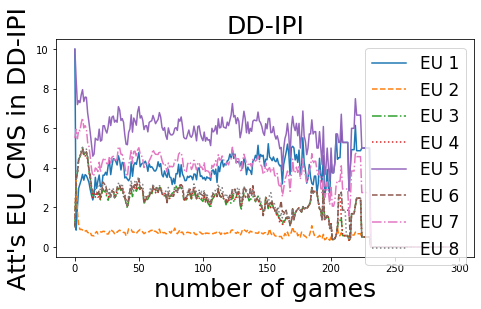

In [45]:
# Attacker EU_CMS
the_file = open("data/"+current_scheme+"/R_self_4/att_EU_CMS.pkl", "rb")
att_EU_CMS_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
max_length = 0
for key in att_EU_CMS_all_result.keys():
    if max_length < len(att_EU_CMS_all_result[key]):
        max_length = len(att_EU_CMS_all_result[key])

average_EU_CMS = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    att_EU_CMS = np.zeros(8)
    for key in att_EU_CMS_all_result.keys():
        if len(att_EU_CMS_all_result[key]) > 0:
            att_EU_CMS = np.add(att_EU_CMS, att_EU_CMS_all_result[key][0])
            att_EU_CMS_all_result[key] = np.delete(att_EU_CMS_all_result[key], 0, 0)
            number_on_index += 1
    average_EU_CMS.append((att_EU_CMS/number_on_index).tolist())
average_EU_CMS = np.array(average_EU_CMS)

for index in range(8):
    plt.plot(range(max_length), average_EU_CMS[:,index], linestyle=all_linestyle[index] , label=f"EU {index+1}")
plt.legend(prop={"size":legend_size})
plt.title(current_scheme, fontsize=font_size)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel(f"Att's EU_CMS in {current_scheme}", fontsize=font_size)


Text(0, 0.5, "def's EU_C in DD-IPI")

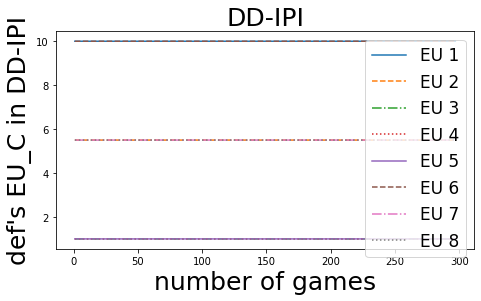

In [46]:
# defacker EU_C
the_file = open("data/"+current_scheme+"/R_self_4/def_EU_C.pkl", "rb")
def_EU_C_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
max_length = 0
for key in def_EU_C_all_result.keys():
    if max_length < len(def_EU_C_all_result[key]):
        max_length = len(def_EU_C_all_result[key])

average_EU_C = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    def_EU_C = np.zeros(8)
    for key in def_EU_C_all_result.keys():
        if len(def_EU_C_all_result[key]) > 0:
            def_EU_C = np.add(def_EU_C, def_EU_C_all_result[key][0])
            def_EU_C_all_result[key] = np.delete(def_EU_C_all_result[key], 0, 0)
            number_on_index += 1
    average_EU_C.append((def_EU_C/number_on_index).tolist())
average_EU_C = np.array(average_EU_C)

for index in range(8):
    plt.plot(range(max_length)[1:], average_EU_C[:,index][1:], linestyle=all_linestyle[index] , label=f"EU {index+1}")
plt.legend(prop={"size":legend_size})
plt.title(current_scheme, fontsize=font_size)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel(f"def's EU_C in {current_scheme}", fontsize=font_size)


Text(0, 0.5, "def's EU_CMS in DD-IPI")

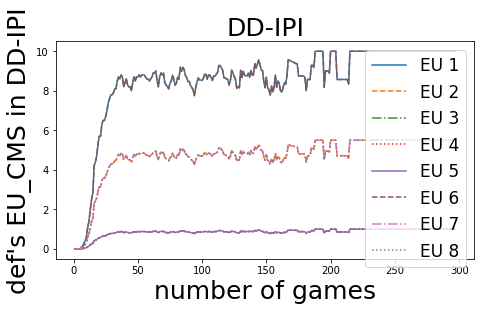

In [47]:
# defacker EU_CMS
the_file = open("data/"+current_scheme+"/R_self_4/def_EU_CMS.pkl", "rb")
def_EU_CMS_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
max_length = 0
for key in def_EU_CMS_all_result.keys():
    if max_length < len(def_EU_CMS_all_result[key]):
        max_length = len(def_EU_CMS_all_result[key])

average_EU_CMS = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    def_EU_CMS = np.zeros(8)
    for key in def_EU_CMS_all_result.keys():
        if len(def_EU_CMS_all_result[key]) > 0:
            def_EU_CMS = np.add(def_EU_CMS, def_EU_CMS_all_result[key][0])
            def_EU_CMS_all_result[key] = np.delete(def_EU_CMS_all_result[key], 0, 0)
            number_on_index += 1
    average_EU_CMS.append((def_EU_CMS/number_on_index).tolist())
average_EU_CMS = np.array(average_EU_CMS)

for index in range(8):
    plt.plot(range(max_length)[1:], average_EU_CMS[:,index][1:], linestyle=all_linestyle[index] , label=f"EU {index+1}")
plt.legend(prop={"size":legend_size})
plt.title(current_scheme, fontsize=font_size)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel(f"def's EU_CMS in {current_scheme}", fontsize=font_size)


Text(0, 0.5, "Att's impact in DD-IPI")

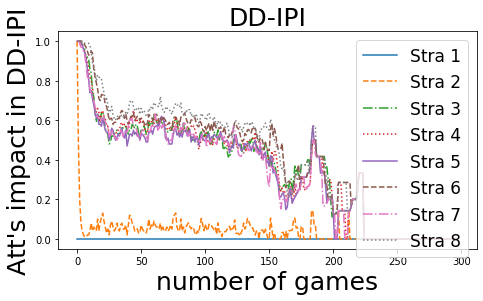

In [48]:
# Attacker impact
the_file = open("data/"+current_scheme+"/R_self_4/att_impact.pkl", "rb")
att_impact_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
max_length = 0
for key in att_impact_all_result.keys():
    if max_length < len(att_impact_all_result[key]):
        max_length = len(att_impact_all_result[key])

average_impact = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    att_impact = np.zeros(8)
    for key in att_impact_all_result.keys():
        if len(att_impact_all_result[key]) > 0:
            att_impact = np.add(att_impact, att_impact_all_result[key][0])
            att_impact_all_result[key] = np.delete(att_impact_all_result[key], 0, 0)
            number_on_index += 1
    average_impact.append((att_impact/number_on_index).tolist())
average_impact = np.array(average_impact)

for index in range(8):
    plt.plot(range(max_length), average_impact[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")
plt.legend(prop={"size":legend_size})
plt.title(current_scheme, fontsize=font_size)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel(f"Att's impact in {current_scheme}", fontsize=font_size)


Text(0, 0.5, "def's impact in DD-IPI")

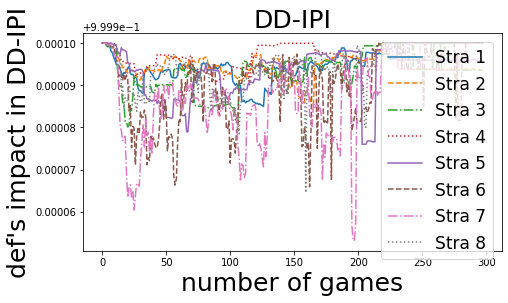

In [49]:
# defacker impact
the_file = open("data/"+current_scheme+"/R_self_4/def_impact.pkl", "rb")
def_impact_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
max_length = 0
for key in def_impact_all_result.keys():
    if max_length < len(def_impact_all_result[key]):
        max_length = len(def_impact_all_result[key])

average_impact = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    def_impact = np.zeros(8)
    for key in def_impact_all_result.keys():
        if len(def_impact_all_result[key]) > 0:
            def_impact = np.add(def_impact, def_impact_all_result[key][0])
            def_impact_all_result[key] = np.delete(def_impact_all_result[key], 0, 0)
            number_on_index += 1
    average_impact.append((def_impact/number_on_index).tolist())
average_impact = np.array(average_impact)

for index in range(8):
    plt.plot(range(max_length), average_impact[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")
plt.legend(prop={"size":legend_size})
plt.title(current_scheme, fontsize=font_size)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel(f"def's impact in {current_scheme}", fontsize=font_size)


Text(0, 0.5, "Att's HEU in DD-IPI")

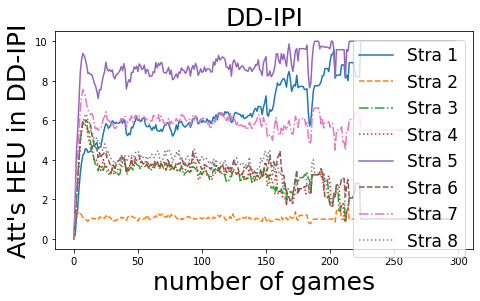

In [50]:
# Attacker HEU
the_file = open("data/"+current_scheme+"/R_self_4/att_HEU_DD_IPI.pkl", "rb")
att_impact_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
max_length = 0
for key in att_impact_all_result.keys():
    if max_length < len(att_impact_all_result[key]):
        max_length = len(att_impact_all_result[key])

average_impact = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    att_impact = np.zeros(8)
    for key in att_impact_all_result.keys():
        if len(att_impact_all_result[key]) > 0:
            att_impact = np.add(att_impact, att_impact_all_result[key][0])
            att_impact_all_result[key] = np.delete(att_impact_all_result[key], 0, 0)
            number_on_index += 1
    average_impact.append((att_impact/number_on_index).tolist())
average_impact = np.array(average_impact)

for index in range(8):
    plt.plot(range(max_length), average_impact[:,index], linestyle=all_linestyle[index] , label=f"Stra {index+1}")
plt.legend(prop={"size":legend_size})
plt.title(current_scheme, fontsize=font_size)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel(f"Att's HEU in {current_scheme}", fontsize=font_size)


Text(0, 0.5, "def's HEU in DD-IPI")

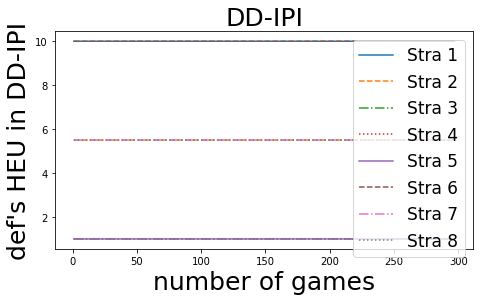

In [51]:
# defacker HEU
the_file = open("data/"+current_scheme+"/R_self_4/def_HEU_DD_IPI.pkl", "rb")
def_impact_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
max_length = 0
for key in def_impact_all_result.keys():
    if max_length < len(def_impact_all_result[key]):
        max_length = len(def_impact_all_result[key])

average_impact = []
for index in range(max_length):
    sum_on_index = 0
    number_on_index = 0
    def_impact = np.zeros(8)
    for key in def_impact_all_result.keys():
        if len(def_impact_all_result[key]) > 0:
            def_impact = np.add(def_impact, def_impact_all_result[key][0])
            def_impact_all_result[key] = np.delete(def_impact_all_result[key], 0, 0)
            number_on_index += 1
    average_impact.append((def_impact/number_on_index).tolist())
average_impact = np.array(average_impact)

for index in range(8):
    plt.plot(range(max_length)[1:], average_impact[:,index][1:], linestyle=all_linestyle[index] , label=f"Stra {index+1}")
plt.legend(prop={"size":legend_size})
plt.title(current_scheme, fontsize=font_size)
plt.xlabel("number of games", fontsize=font_size)
plt.ylabel(f"def's HEU in {current_scheme}", fontsize=font_size)


In [52]:
def single_label(bar):
    decimal_number = 3
    for rect in bar:
        height = round(rect.get_height(), decimal_number)
        if height >= 0:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom')
        else:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='top')

            

Text(0, 0.5, 'Frequency of Strategy called')

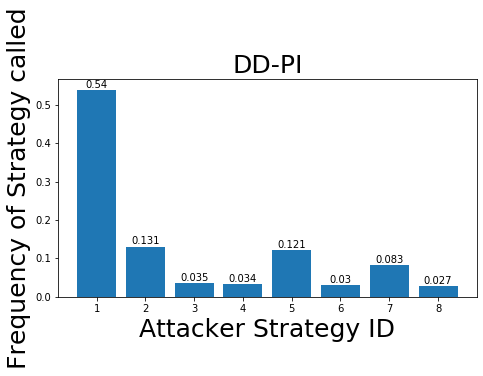

In [53]:
# Attacker Strategy distribution
current_scheme = "DD-PI"
the_file = open("data/"+current_scheme+"/R2/att_strategy_counter.pkl", "rb")
att_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
y_axis = np.zeros(8)
for key in att_strat_count.keys():
    for strat_id in att_strat_count[key]:
        y_axis[strat_id] += 1
        
# normalize y_axis
y_axis = y_axis / (sum(y_axis))
x_axis = range(1,9)
bar1 = plt.bar(x_axis, y_axis)
single_label(bar1)


plt.title(current_scheme, fontsize=font_size)
plt.xlabel("Attacker Strategy ID", fontsize=font_size)
plt.ylabel("Frequency of Strategy called", fontsize=font_size)


Text(0, 0.5, 'Frequency of Strategy called')

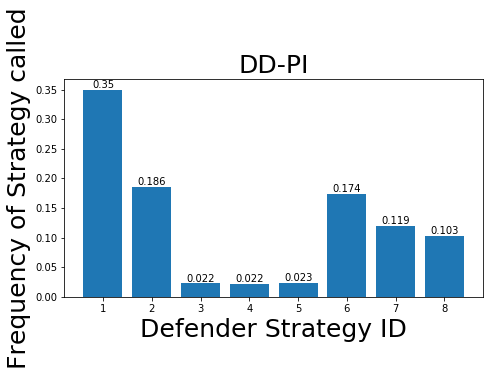

In [54]:
# defacker Strategy distribution
current_scheme = "DD-PI"
the_file = open("data/"+current_scheme+"/R2/def_strategy_counter.pkl", "rb")
def_strat_count = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
y_axis = np.zeros(8)
for key in def_strat_count.keys():
    for strat_id in def_strat_count[key]:
        y_axis[strat_id] += 1
        
# normalize y_axis
y_axis = y_axis / (sum(y_axis))
x_axis = range(1,9)
bar1 = plt.bar(x_axis, y_axis)
single_label(bar1)


plt.title(current_scheme, fontsize=font_size)
plt.xlabel("Defender Strategy ID", fontsize=font_size)
plt.ylabel("Frequency of Strategy called", fontsize=font_size)


Text(0, 0.5, "Att's nomalized EU_C (pmf)")

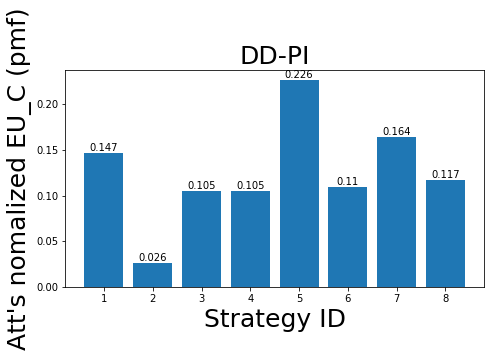

In [55]:
# Attacker EU_C
current_scheme = "DD-PI"
the_file = open("data/"+current_scheme+"/R_self_4/att_EU_C.pkl", "rb")
att_EU_C_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
y_axis = np.zeros(8)
counter=0
for key in att_EU_C_all_result.keys():
    for index in range(len(att_EU_C_all_result[key])):
        y_axis = y_axis + att_EU_C_all_result[key][index]
        counter += 1

y_axis = y_axis/counter
y_axis = y_axis/sum(y_axis)
x_axis = range(1,9)
bar1 = plt.bar(x_axis, y_axis)
single_label(bar1)


plt.title(current_scheme, fontsize=font_size)
plt.xlabel("Strategy ID", fontsize=font_size)
plt.ylabel("Att's nomalized EU_C (pmf)", fontsize=font_size)


Text(0, 0.5, "def's nomalized EU_C (pmf)")

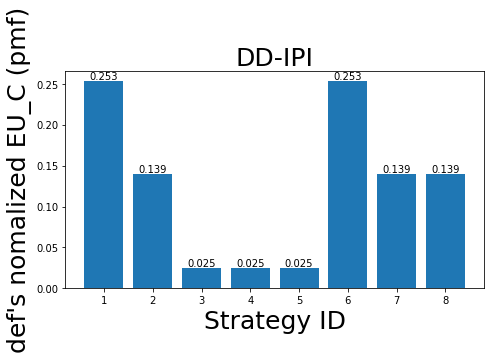

In [56]:
# defacker EU_C
current_scheme = "DD-IPI"
the_file = open("data/"+current_scheme+"/R_self_4/def_EU_C.pkl", "rb")
def_EU_C_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
y_axis = np.zeros(8)
counter=0
for key in def_EU_C_all_result.keys():
    for index in range(len(def_EU_C_all_result[key])):
        y_axis = y_axis + def_EU_C_all_result[key][index]
        counter += 1

y_axis = y_axis/counter
y_axis = y_axis/sum(y_axis)
x_axis = range(1,9)
bar1 = plt.bar(x_axis, y_axis)
single_label(bar1)


plt.title(current_scheme, fontsize=font_size)
plt.xlabel("Strategy ID", fontsize=font_size)
plt.ylabel("def's nomalized EU_C (pmf)", fontsize=font_size)


Text(0, 0.5, "Att's nomalized EU_CMS (pmf)")

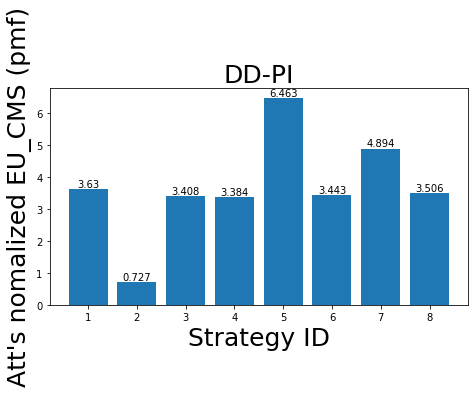

In [57]:
# Attacker EU_CMS
current_scheme = "DD-PI"
the_file = open("data/"+current_scheme+"/R_self_4/att_EU_CMS.pkl", "rb")
att_EU_CMS_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
y_axis = np.zeros(8)
counter=0
for key in att_EU_CMS_all_result.keys():
    for index in range(len(att_EU_CMS_all_result[key])):
        y_axis = y_axis + att_EU_CMS_all_result[key][index]
        counter += 1

y_axis = y_axis/counter
x_axis = range(1,9)
bar1 = plt.bar(x_axis, y_axis)
single_label(bar1)


plt.title(current_scheme, fontsize=font_size)
plt.xlabel("Strategy ID", fontsize=font_size)
plt.ylabel("Att's nomalized EU_CMS (pmf)", fontsize=font_size)



Text(0, 0.5, "def's nomalized EU_CMS (pmf)")

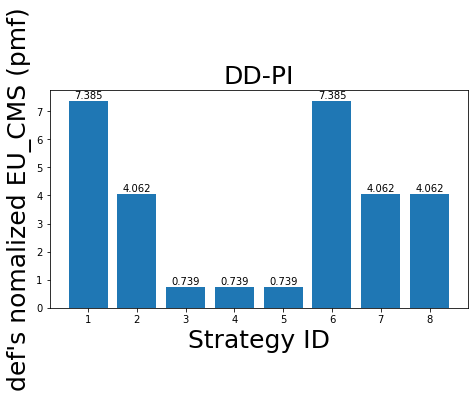

In [58]:
# defacker EU_CMS
current_scheme = "DD-PI"
the_file = open("data/"+current_scheme+"/R_self_4/def_EU_CMS.pkl", "rb")
def_EU_CMS_all_result = pickle.load(the_file)
the_file.close()

plt.figure(figsize=(figure_width, figure_high))
y_axis = np.zeros(8)
counter=0
for key in def_EU_CMS_all_result.keys():
    for index in range(len(def_EU_CMS_all_result[key])):
        y_axis = y_axis + def_EU_CMS_all_result[key][index]
        counter += 1

y_axis = y_axis/counter
x_axis = range(1,9)
bar1 = plt.bar(x_axis, y_axis)
single_label(bar1)


plt.title(current_scheme, fontsize=font_size)
plt.xlabel("Strategy ID", fontsize=font_size)
plt.ylabel("def's nomalized EU_CMS (pmf)", fontsize=font_size)



Text(0, 0.5, 'Attacker Cost')

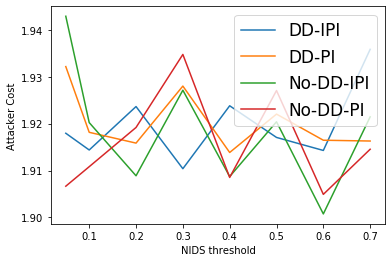

In [59]:
att_cost_all_result = np.zeros(8)

value_range = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
scheme_range = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]
for scheme in scheme_range:
    for index in range(len(value_range)):
        the_file = open("data/best_NIDS/"+scheme+"/"+str(value_range[index])+"/att_cost.pkl",
                            "rb")
        att_cost_all_result[index] = pickle.load(the_file)
        the_file.close()    

    plt.plot(value_range, att_cost_all_result, label=scheme)

plt.legend(prop={"size":legend_size})
plt.xlabel("NIDS threshold")
plt.ylabel("Attacker Cost")

Text(0, 0.5, 'Defender Cost')

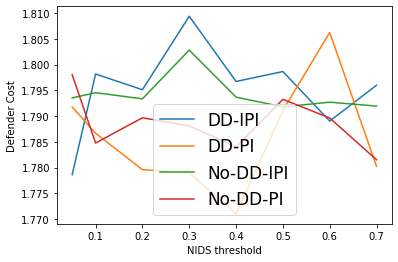

In [60]:
def_cost_all_result = np.zeros(8)

value_range = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
scheme_range = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]
for scheme in scheme_range:
    for index in range(len(value_range)):
        the_file = open("data/best_NIDS/"+scheme+"/"+str(value_range[index])+"/def_cost.pkl",
                            "rb")
        def_cost_all_result[index] = pickle.load(the_file)
        the_file.close()    

    plt.plot(value_range, def_cost_all_result, label=scheme)

plt.legend(prop={"size":legend_size})
plt.xlabel("NIDS threshold")
plt.ylabel("Defender Cost")

Text(0, 0.5, 'MTTSF')

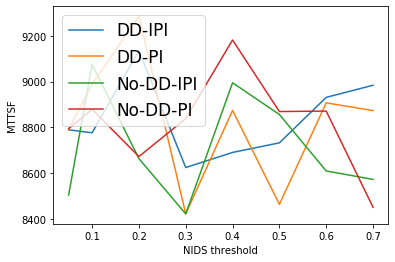

In [61]:
MTTSF_all_result = np.zeros(8)

value_range = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
scheme_range = ["DD-IPI", "DD-PI", "No-DD-IPI", "No-DD-PI"]
for scheme in scheme_range:
    for index in range(len(value_range)):
        the_file = open("data/best_NIDS/"+scheme+"/"+str(value_range[index])+"/MTTSF.pkl",
                            "rb")
        MTTSF_all_result[index] = pickle.load(the_file)
        the_file.close()    

    plt.plot(value_range, MTTSF_all_result, label=scheme)

plt.legend(prop={"size":legend_size})
plt.xlabel("NIDS threshold")
plt.ylabel("MTTSF")